### k-Nearest Network

Load the iris data

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

print(iris_data[1], iris_data[51], iris_data[101])
print(iris_labels[1], iris_labels[51], iris_labels[101])

[4.9 3.  1.4 0.2] [6.4 3.2 4.5 1.5] [5.8 2.7 5.1 1.9]
0 1 2


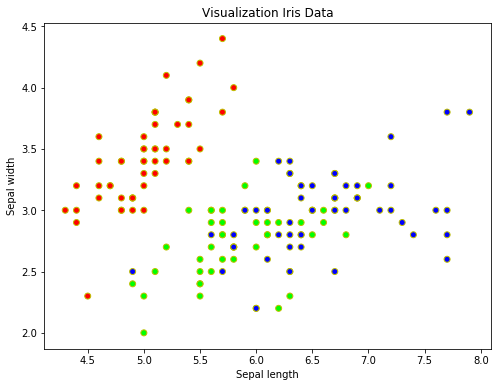

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Visualization Iris Data')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

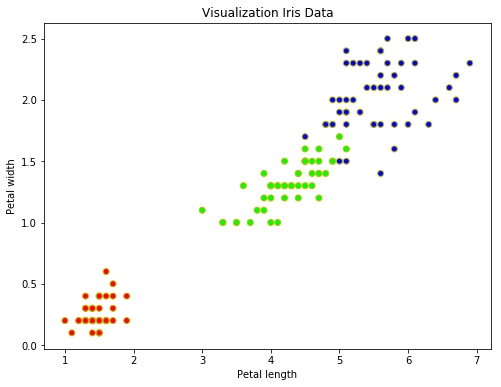

In [5]:
X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Visualization Iris Data')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

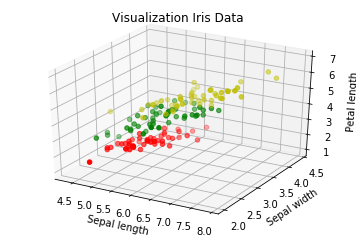

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = []
for kelas in range(3):
    X.append([[], [], []])
    for i in range(len(iris_data)):
        if iris_labels[i] == kelas:
            X[kelas][0].append(iris_data[i][0])
            X[kelas][1].append(iris_data[i][1])
            X[kelas][2].append(iris_data[i][2])
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for kelas in range(3):
       ax.scatter(X[kelas][0], X[kelas][1], X[kelas][2], c=colours[kelas])

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.title('Visualization Iris Data')
plt.show()

In [7]:
np.random.seed(45)
indices = np.random.permutation(len(iris_data))
n_samples = 50

trainset_data = iris_data[indices[:-n_samples]]
trainset_labels = iris_labels[indices[:-n_samples]]

testset_data = iris_data[indices[-n_samples:]]
testset_labels = iris_labels[indices[-n_samples:]]

print(trainset_data.shape, trainset_labels.shape)
print(testset_data.shape, testset_labels.shape)

(100, 4) (100,)
(50, 4) (50,)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=.33)
print('X_train', X_train.shape, 'Y_train', Y_train.shape)
print('X_test', X_test.shape, 'Y_test', Y_test.shape)

X_train (100, 4) Y_train (100,)
X_test (50, 4) Y_test (50,)


In [9]:
def distance(data1, data2):
   
    data1 = np.array(data1) 
    data2 = np.array(data2)
    
    return np.linalg.norm(data1 - data2)

print(iris_data[1])
print(iris_data[51])
print(distance(iris_data[1], iris_data[51]))


[4.9 3.  1.4 0.2]
[6.4 3.2 4.5 1.5]
3.6864617182333523


In [10]:
import math
def euclideanDistance(data1, data2, panjang):
	distance = 0
	for x in range(panjang):
		distance += pow((data1[x] - data2[x]), 2)
	return math.sqrt(distance)

panjang = len(iris_data[1])
print(iris_data[1])
print(iris_data[51])
print(euclideanDistance(iris_data[1], iris_data[51], panjang))

[4.9 3.  1.4 0.2]
[6.4 3.2 4.5 1.5]
3.6864617182333523


In [11]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

In [12]:
for i in range(5):
    neighbors = get_neighbors(X_train, 
                              Y_train, 
                              X_test[i], 
                              3, 
                              distance=distance)
    print(i, 
          X_test[i], 
          Y_test[i], 
          neighbors)

0 [6.  2.9 4.5 1.5] 1 [(array([5.9, 3. , 4.2, 1.5]), 0.33166247903553975, 1), (array([6.2, 2.9, 4.3, 1.3]), 0.3464101615137756, 1), (array([5.6, 3. , 4.5, 1.5]), 0.4123105625617664, 1)]
1 [6.  2.7 5.1 1.6] 1 [(array([6.3, 2.8, 5.1, 1.5]), 0.33166247903553975, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.3605551275463989, 2), (array([5.9, 3. , 5.1, 1.8]), 0.3741657386773939, 2)]
2 [5.1 3.4 1.5 0.2] 0 [(array([5.2, 3.5, 1.5, 0.2]), 0.14142135623730995, 0), (array([5.2, 3.4, 1.4, 0.2]), 0.14142135623730995, 0), (array([5. , 3.3, 1.4, 0.2]), 0.17320508075688762, 0)]
3 [4.9 3.1 1.5 0.1] 0 [(array([4.9, 3.1, 1.5, 0.1]), 0.0, 0), (array([4.9, 3.1, 1.5, 0.1]), 0.0, 0), (array([4.8, 3. , 1.4, 0.1]), 0.17320508075688812, 0)]
4 [4.6 3.4 1.4 0.3] 0 [(array([4.6, 3.2, 1.4, 0.2]), 0.22360679774997871, 0), (array([4.4, 3.2, 1.3, 0.2]), 0.3162277660168373, 0), (array([4.7, 3.2, 1.6, 0.2]), 0.31622776601683805, 0)]


In [13]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [15]:
for i in range(n_samples):
    neighbors = get_neighbors(X_train, 
                              Y_train, 
                              X_test[i], 
                              3, 
                              distance=distance)

    print("index: ", i, 
          ", prediction: ", vote(neighbors), 
          ", label: ", Y_test[i], 
          ", data: ", X_test[i])

index:  0 , prediction:  1 , label:  1 , data:  [6.  2.9 4.5 1.5]
index:  1 , prediction:  2 , label:  1 , data:  [6.  2.7 5.1 1.6]
index:  2 , prediction:  0 , label:  0 , data:  [5.1 3.4 1.5 0.2]
index:  3 , prediction:  0 , label:  0 , data:  [4.9 3.1 1.5 0.1]
index:  4 , prediction:  0 , label:  0 , data:  [4.6 3.4 1.4 0.3]
index:  5 , prediction:  2 , label:  2 , data:  [5.8 2.7 5.1 1.9]
index:  6 , prediction:  2 , label:  2 , data:  [6.4 2.8 5.6 2.1]
index:  7 , prediction:  0 , label:  0 , data:  [4.8 3.1 1.6 0.2]
index:  8 , prediction:  1 , label:  1 , data:  [5.6 2.5 3.9 1.1]
index:  9 , prediction:  0 , label:  0 , data:  [5.5 4.2 1.4 0.2]
index:  10 , prediction:  1 , label:  1 , data:  [6.1 3.  4.6 1.4]
index:  11 , prediction:  1 , label:  1 , data:  [5.5 2.4 3.7 1. ]
index:  12 , prediction:  0 , label:  0 , data:  [4.4 3.  1.3 0.2]
index:  13 , prediction:  1 , label:  1 , data:  [5.7 2.6 3.5 1. ]
index:  14 , prediction:  1 , label:  1 , data:  [6.9 3.1 4.9 1.5]
index